In [28]:
import tensorflow as tf
import gen_data
import matplotlib.pyplot as plt

Epoch 1/20


2022-11-27 23:57:46.579899: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 1s 108ms/step - loss: 1.0000 - binary_accuracy: 0.3568 - val_loss: 0.9992 - val_binary_accuracy: 0.2943
Epoch 2/20
4/4 [==============================] - ETA: 0s - loss: 0.9984 - binary_accuracy: 0.3568

2022-11-27 23:57:47.111536: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 31ms/step - loss: 0.9984 - binary_accuracy: 0.3568 - val_loss: 0.9855 - val_binary_accuracy: 0.2943
Epoch 3/20
4/4 [==============================] - 0s 31ms/step - loss: 0.9825 - binary_accuracy: 0.3568 - val_loss: 0.9354 - val_binary_accuracy: 0.2943
Epoch 4/20
4/4 [==============================] - 0s 22ms/step - loss: 0.9402 - binary_accuracy: 0.3568 - val_loss: 0.8840 - val_binary_accuracy: 0.2943
Epoch 5/20
4/4 [==============================] - 0s 25ms/step - loss: 0.8980 - binary_accuracy: 0.3568 - val_loss: 0.8282 - val_binary_accuracy: 0.2943
Epoch 6/20
4/4 [==============================] - 0s 21ms/step - loss: 0.8524 - binary_accuracy: 0.3568 - val_loss: 0.7637 - val_binary_accuracy: 0.2943
Epoch 7/20
4/4 [==============================] - 0s 22ms/step - loss: 0.7935 - binary_accuracy: 0.3568 - val_loss: 0.6886 - val_binary_accuracy: 0.2943
Epoch 8/20
4/4 [==============================] - 0s 22ms/step - loss: 0.7255 - binary_accura

2022-11-27 23:57:49.209058: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


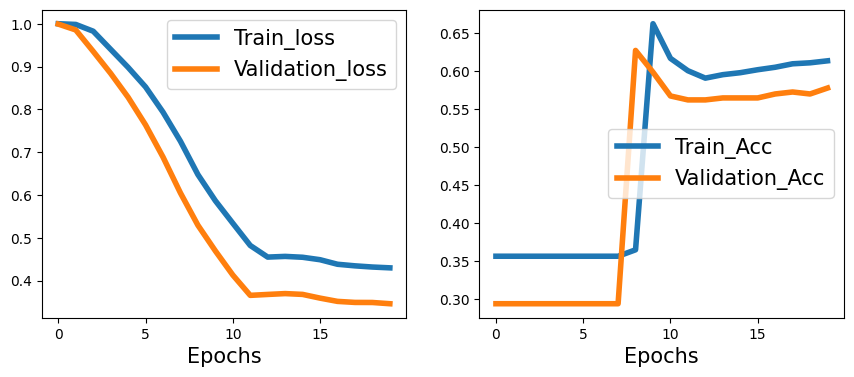

In [29]:
x_train, x_test, y_train, y_test = gen_data.gen_data(data_size=1000, preproess=True)

# split data into train and test
pirot = 0.8
x_train, x_test = x_train[:int(len(x_train)*pirot)], x_train[int(len(x_train)*pirot):]
y_train, y_test = y_train[:int(len(y_train)*pirot)], y_train[int(len(y_train)*pirot):]

# create a Keras layer called "NoisyLinear"
class NoisyLinear(tf.keras.layers.Layer):
    def __init__(self, outputdim, noise_stddev=0.1, **kwargs):
        self.output_dim = outputdim
        self.noise_stddev = noise_stddev
        super(NoisyLinear, self).__init__(**kwargs)

    def build(self, input_shape):
        self.w = self.add_weight(name='weights', shape=(
            input_shape[1], self.output_dim), initializer='random_normal', trainable=True)
        self.b = self.add_weight(name='weights', shape=(
            self.output_dim,), initializer='zeros', trainable=True)

    def call(self, inputs, training=False):
        if training:
            batch = tf.shape(inputs)[0]
            dim = tf.shape(inputs)[1]
            noise = tf.random.normal(
                shape=(batch, dim), mean=0.0, stddev=self.noise_stddev)
            noisy_inputs = tf.add(inputs, noise)
        else:
            noisy_inputs = inputs
        z = tf.matmul(noisy_inputs, self.w)+self.b
        return tf.keras.activations.relu(z)

    def get_config(self):
        config = super(NoisyLinear, self).get_config()
        config.update({'outputdim': self.output_dim,
                      'noise_stddev': self.noise_stddev})
        return config
    
# create a Keras model 建立此模型為四層的全連接層深度網路，三個隱藏層的神經 元數都是32個。
MyModel = tf.keras.Sequential([
    NoisyLinear(32, noise_stddev=0.1), 
    tf.keras.layers.Dense(units=32, activation='relu'), 
    tf.keras.layers.Dense(units=32, activation='relu'), 
    tf.keras.layers.Dense(units=1, activation='relu')])

# compile the model
MyModel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.CategoricalHinge(), metrics=['binary_accuracy'])

# train the model
history = MyModel.fit(x_train, y_train, epochs=20, batch_size=500, validation_split=0.2)
history = history.history
# evaluate the model
MyModel.evaluate(x_test, y_test)

# predict the model
MyModel.predict(x_test)


fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
plt.legend(['Train_loss', 'Validation_loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
plt.legend(['Train_Acc', 'Validation_Acc'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
plt.show()



Epoch 1/20


2022-11-27 23:57:49.745561: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 1s 101ms/step - loss: 0.9985 - binary_accuracy: 0.3555 - val_loss: 0.9904 - val_binary_accuracy: 0.2917
Epoch 2/20
4/4 [==============================] - ETA: 0s - loss: 0.9797 - binary_accuracy: 0.3496

2022-11-27 23:57:50.152213: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 35ms/step - loss: 0.9797 - binary_accuracy: 0.3496 - val_loss: 0.9404 - val_binary_accuracy: 0.2812
Epoch 3/20
4/4 [==============================] - 0s 22ms/step - loss: 0.9351 - binary_accuracy: 0.3223 - val_loss: 0.8230 - val_binary_accuracy: 0.2422
Epoch 4/20
4/4 [==============================] - 0s 23ms/step - loss: 0.8791 - binary_accuracy: 0.2786 - val_loss: 0.7564 - val_binary_accuracy: 0.2266
Epoch 5/20
4/4 [==============================] - 0s 19ms/step - loss: 0.8026 - binary_accuracy: 0.2975 - val_loss: 0.7141 - val_binary_accuracy: 0.2630
Epoch 6/20
4/4 [==============================] - 0s 17ms/step - loss: 0.7434 - binary_accuracy: 0.3333 - val_loss: 0.6885 - val_binary_accuracy: 0.2734
Epoch 7/20
4/4 [==============================] - 0s 20ms/step - loss: 0.7177 - binary_accuracy: 0.3379 - val_loss: 0.6572 - val_binary_accuracy: 0.2552
Epoch 8/20
4/4 [==============================] - 0s 19ms/step - loss: 0.7014 - binary_accura

2022-11-27 23:57:51.978571: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


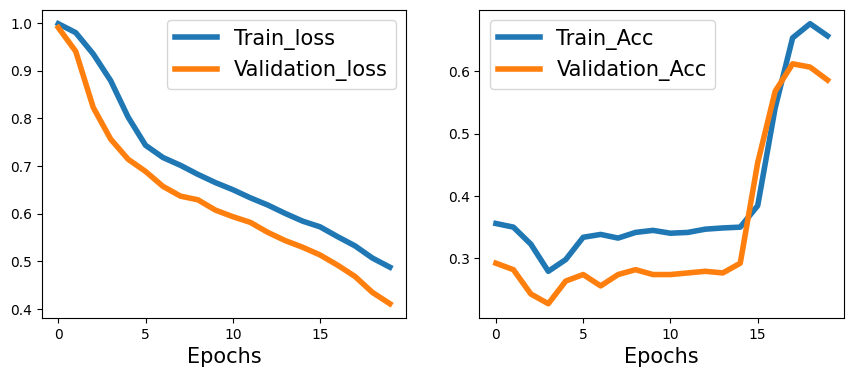

In [30]:
x_train, x_test, y_train, y_test = gen_data.gen_data(data_size=1000, preproess=False)

# split data into train and test
pirot = 0.8
x_train, x_test = x_train[:int(len(x_train)*pirot)], x_train[int(len(x_train)*pirot):]
y_train, y_test = y_train[:int(len(y_train)*pirot)], y_train[int(len(y_train)*pirot):]

# create a Keras layer called "NoisyLinear"
class NoisyLinear(tf.keras.layers.Layer):
    def __init__(self, outputdim, noise_stddev=0.1, **kwargs):
        self.output_dim = outputdim
        self.noise_stddev = noise_stddev
        super(NoisyLinear, self).__init__(**kwargs)

    def build(self, input_shape):
        self.w = self.add_weight(name='weights', shape=(
            input_shape[1], self.output_dim), initializer='random_normal', trainable=True)
        self.b = self.add_weight(name='weights', shape=(
            self.output_dim,), initializer='zeros', trainable=True)

    def call(self, inputs, training=False):
        if training:
            batch = tf.shape(inputs)[0]
            dim = tf.shape(inputs)[1]
            noise = tf.random.normal(
                shape=(batch, dim), mean=0.0, stddev=self.noise_stddev)
            noisy_inputs = tf.add(inputs, noise)
        else:
            noisy_inputs = inputs
        z = tf.matmul(noisy_inputs, self.w)+self.b
        return tf.keras.activations.relu(z)

    def get_config(self):
        config = super(NoisyLinear, self).get_config()
        config.update({'outputdim': self.output_dim,
                      'noise_stddev': self.noise_stddev})
        return config
    
# create a Keras model 建立此模型為四層的全連接層深度網路，三個隱藏層的神經 元數都是32個。
MyModel = tf.keras.Sequential([
    NoisyLinear(32, noise_stddev=0.1), 
    tf.keras.layers.Dense(units=32, activation='relu'), 
    tf.keras.layers.Dense(units=32, activation='relu'), 
    tf.keras.layers.Dense(units=1, activation='relu')])

# compile the model
MyModel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.CategoricalHinge(), metrics=['binary_accuracy'])

# train the model
history = MyModel.fit(x_train, y_train, epochs=20, batch_size=500, validation_split=0.2)
history = history.history
# evaluate the model
MyModel.evaluate(x_test, y_test)

# predict the model
MyModel.predict(x_test)


fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
plt.legend(['Train_loss', 'Validation_loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
plt.legend(['Train_Acc', 'Validation_Acc'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
plt.show()



Epoch 1/20


2022-11-27 23:57:52.613937: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


308/308 [==============================] - ETA: 0s - loss: 0.4138 - binary_accuracy: 0.6125

2022-11-27 23:57:56.074820: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


308/308 [==============================] - 4s 13ms/step - loss: 0.4138 - binary_accuracy: 0.6125 - val_loss: 0.3677 - val_binary_accuracy: 0.6366
Epoch 2/20
308/308 [==============================] - 4s 12ms/step - loss: 0.3661 - binary_accuracy: 0.6434 - val_loss: 0.3626 - val_binary_accuracy: 0.6429
Epoch 3/20
308/308 [==============================] - 4s 13ms/step - loss: 0.3629 - binary_accuracy: 0.6484 - val_loss: 0.3592 - val_binary_accuracy: 0.6488
Epoch 4/20
308/308 [==============================] - 3s 11ms/step - loss: 0.3609 - binary_accuracy: 0.6517 - val_loss: 0.3591 - val_binary_accuracy: 0.6492
Epoch 5/20
308/308 [==============================] - 4s 11ms/step - loss: 0.3600 - binary_accuracy: 0.6529 - val_loss: 0.3573 - val_binary_accuracy: 0.6523
Epoch 6/20
308/308 [==============================] - 4s 11ms/step - loss: 0.3591 - binary_accuracy: 0.6544 - val_loss: 0.3559 - val_binary_accuracy: 0.6530
Epoch 7/20
308/308 [==============================] - 4s 14ms/step - 

2022-11-27 23:59:16.925340: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - 4s 3ms/step


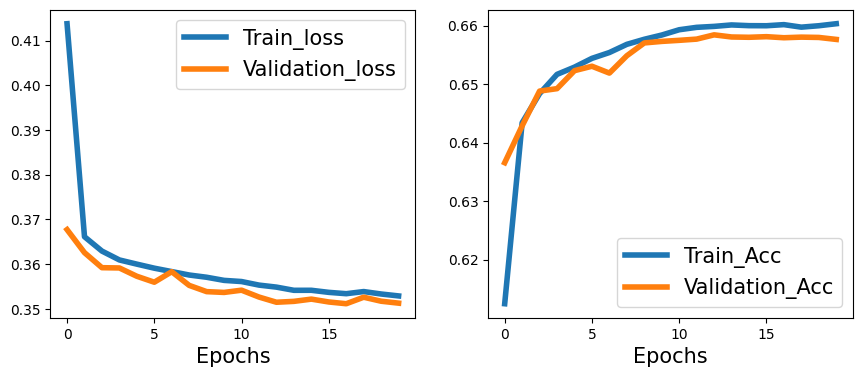

In [31]:
x_train, x_test, y_train, y_test = gen_data.gen_data(data_size=100000, preproess=True)

# split data into train and test
pirot = 0.8
x_train, x_test = x_train[:int(len(x_train)*pirot)], x_train[int(len(x_train)*pirot):]
y_train, y_test = y_train[:int(len(y_train)*pirot)], y_train[int(len(y_train)*pirot):]

# create a Keras layer called "NoisyLinear"
class NoisyLinear(tf.keras.layers.Layer):
    def __init__(self, outputdim, noise_stddev=0.1, **kwargs):
        self.output_dim = outputdim
        self.noise_stddev = noise_stddev
        super(NoisyLinear, self).__init__(**kwargs)

    def build(self, input_shape):
        self.w = self.add_weight(name='weights', shape=(
            input_shape[1], self.output_dim), initializer='random_normal', trainable=True)
        self.b = self.add_weight(name='weights', shape=(
            self.output_dim,), initializer='zeros', trainable=True)

    def call(self, inputs, training=False):
        if training:
            batch = tf.shape(inputs)[0]
            dim = tf.shape(inputs)[1]
            noise = tf.random.normal(
                shape=(batch, dim), mean=0.0, stddev=self.noise_stddev)
            noisy_inputs = tf.add(inputs, noise)
        else:
            noisy_inputs = inputs
        z = tf.matmul(noisy_inputs, self.w)+self.b
        return tf.keras.activations.relu(z)

    def get_config(self):
        config = super(NoisyLinear, self).get_config()
        config.update({'outputdim': self.output_dim,
                      'noise_stddev': self.noise_stddev})
        return config
    
# create a Keras model 建立此模型為四層的全連接層深度網路，三個隱藏層的神經 元數都是32個。
MyModel = tf.keras.Sequential([
    NoisyLinear(32, noise_stddev=0.1), 
    tf.keras.layers.Dense(units=32, activation='relu'), 
    tf.keras.layers.Dense(units=32, activation='relu'), 
    tf.keras.layers.Dense(units=1, activation='relu')])

# compile the model
MyModel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.CategoricalHinge(), metrics=['binary_accuracy'])

# train the model
history = MyModel.fit(x_train, y_train, epochs=20, batch_size=500, validation_split=0.2)
history = history.history
# evaluate the model
MyModel.evaluate(x_test, y_test)

# predict the model
MyModel.predict(x_test)


fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
plt.legend(['Train_loss', 'Validation_loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
plt.legend(['Train_Acc', 'Validation_Acc'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
plt.show()



Epoch 1/20


2022-11-27 23:59:21.648711: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


308/308 [==============================] - ETA: 0s - loss: 0.4418 - binary_accuracy: 0.5764

2022-11-27 23:59:25.520896: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


308/308 [==============================] - 5s 14ms/step - loss: 0.4418 - binary_accuracy: 0.5764 - val_loss: 0.3618 - val_binary_accuracy: 0.6465
Epoch 2/20
308/308 [==============================] - 4s 12ms/step - loss: 0.3599 - binary_accuracy: 0.6506 - val_loss: 0.3597 - val_binary_accuracy: 0.6492
Epoch 3/20
308/308 [==============================] - 4s 13ms/step - loss: 0.3545 - binary_accuracy: 0.6585 - val_loss: 0.3514 - val_binary_accuracy: 0.6593
Epoch 4/20
308/308 [==============================] - 4s 12ms/step - loss: 0.3502 - binary_accuracy: 0.6609 - val_loss: 0.3496 - val_binary_accuracy: 0.6586
Epoch 5/20
308/308 [==============================] - 4s 11ms/step - loss: 0.3492 - binary_accuracy: 0.6608 - val_loss: 0.3483 - val_binary_accuracy: 0.6598
Epoch 6/20
308/308 [==============================] - 3s 11ms/step - loss: 0.3484 - binary_accuracy: 0.6607 - val_loss: 0.3494 - val_binary_accuracy: 0.6579
Epoch 7/20
308/308 [==============================] - 4s 12ms/step - 

2022-11-28 00:00:47.019873: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - 4s 3ms/step


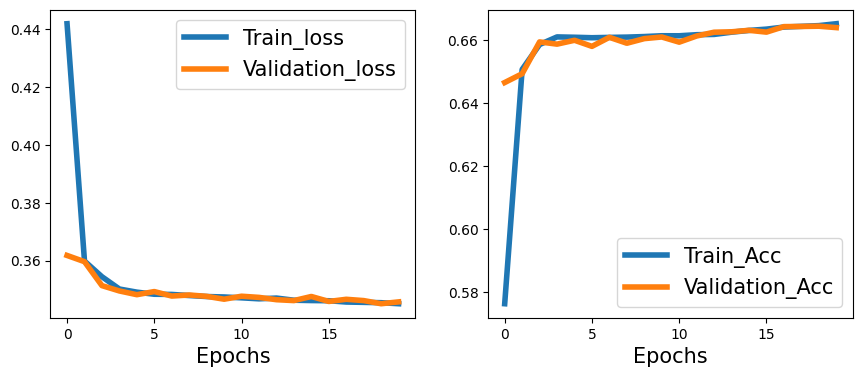

In [32]:
x_train, x_test, y_train, y_test = gen_data.gen_data(data_size=100000, preproess=False)

# split data into train and test
pirot = 0.8
x_train, x_test = x_train[:int(len(x_train)*pirot)], x_train[int(len(x_train)*pirot):]
y_train, y_test = y_train[:int(len(y_train)*pirot)], y_train[int(len(y_train)*pirot):]

# create a Keras layer called "NoisyLinear"
class NoisyLinear(tf.keras.layers.Layer):
    def __init__(self, outputdim, noise_stddev=0.1, **kwargs):
        self.output_dim = outputdim
        self.noise_stddev = noise_stddev
        super(NoisyLinear, self).__init__(**kwargs)

    def build(self, input_shape):
        self.w = self.add_weight(name='weights', shape=(
            input_shape[1], self.output_dim), initializer='random_normal', trainable=True)
        self.b = self.add_weight(name='weights', shape=(
            self.output_dim,), initializer='zeros', trainable=True)

    def call(self, inputs, training=False):
        if training:
            batch = tf.shape(inputs)[0]
            dim = tf.shape(inputs)[1]
            noise = tf.random.normal(
                shape=(batch, dim), mean=0.0, stddev=self.noise_stddev)
            noisy_inputs = tf.add(inputs, noise)
        else:
            noisy_inputs = inputs
        z = tf.matmul(noisy_inputs, self.w)+self.b
        return tf.keras.activations.relu(z)

    def get_config(self):
        config = super(NoisyLinear, self).get_config()
        config.update({'outputdim': self.output_dim,
                      'noise_stddev': self.noise_stddev})
        return config
    
# create a Keras model 建立此模型為四層的全連接層深度網路，三個隱藏層的神經 元數都是32個。
MyModel = tf.keras.Sequential([
    NoisyLinear(32, noise_stddev=0.1), 
    tf.keras.layers.Dense(units=32, activation='relu'), 
    tf.keras.layers.Dense(units=32, activation='relu'), 
    tf.keras.layers.Dense(units=1, activation='relu')])

# compile the model
MyModel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.CategoricalHinge(), metrics=['binary_accuracy'])

# train the model
history = MyModel.fit(x_train, y_train, epochs=20, batch_size=500, validation_split=0.2)
history = history.history
# evaluate the model
MyModel.evaluate(x_test, y_test)

# predict the model
MyModel.predict(x_test)


fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
plt.legend(['Train_loss', 'Validation_loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
plt.legend(['Train_Acc', 'Validation_Acc'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
plt.show()



當標準化後，函數中的特徵會有不同程度的削減，特徵難以維持一樣的強度，造成學習上的困難。但當資料集數量具有一定規模之後，特徵能夠被強化，學習上相較於因為數量少又被正規化的資料集具有更強的學習曲線。